# Exercise 1.2

In [80]:
# Import packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Initialize parameters and graphs

In [81]:
# Initialize parameters
n = 10       # total number of nodes
m = 20       # total number edges
b = int(m/n) # number edges to attach from a new node to existing nodes
seed = 203487  # seed

# Initialize Erdos Renyi graph
G_1 = nx.gnm_random_graph(n, m, seed=seed) # G_1 = nx.erdos_renyi_graph(n, p, seed=seed)
# Initialize Barabasi Albert graph
G_2 = nx.barabasi_albert_graph(n, b, seed=seed)

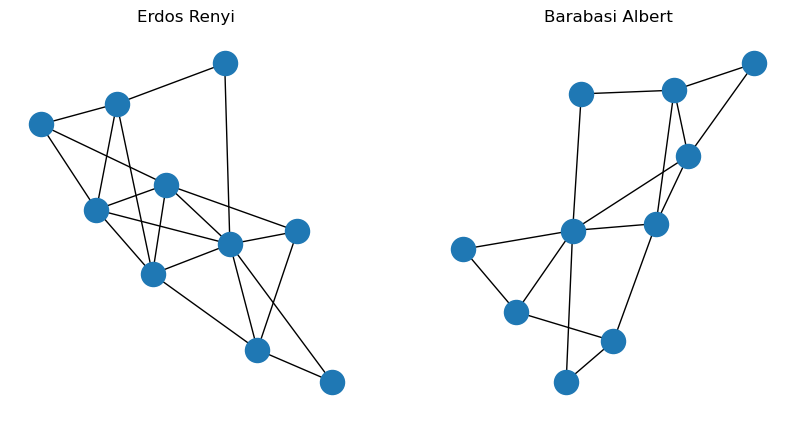

In [82]:
# Plot both graphs
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Erdos Renyi')
pos = nx.spring_layout(G_1, seed=seed)
nx.draw(G_1, pos=pos)

plt.subplot(1,2,2)
plt.title('Barabasi Albert')
pos = nx.spring_layout(G_2, seed=seed)
nx.draw(G_2, pos=pos)

plt.show()

## Compare the PageRank of both graphs

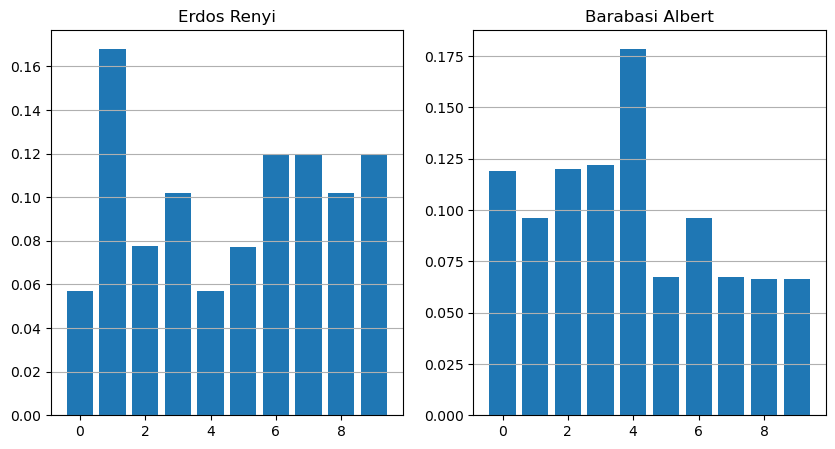

In [83]:
pr_1 = nx.pagerank(G_1, max_iter = 100)
pr_2 = nx.pagerank(G_2, max_iter = 100)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.title('Erdos Renyi')
plt.bar(pr_1.keys(), height = pr_1.values())
plt.grid(axis = 'y')

plt.subplot(1,2,2)
plt.title('Barabasi Albert')
plt.bar(pr_2.keys(), height = pr_2.values())
plt.grid(axis = 'y')

plt.show()

## Compare the degree and PageRank distribution of both graphs

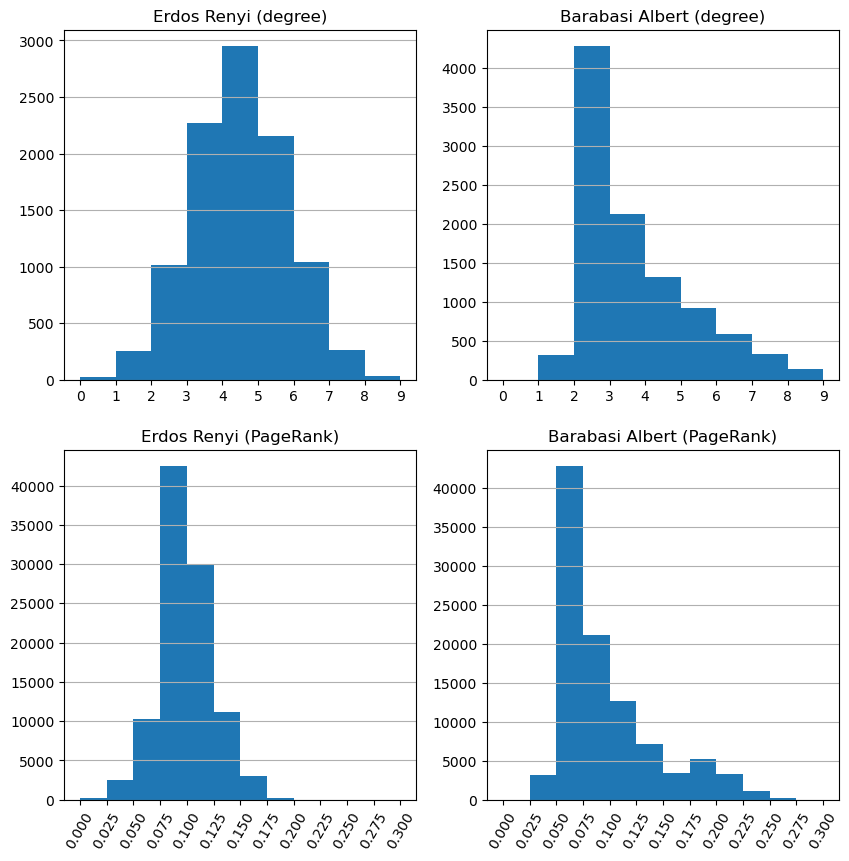

In [108]:
# Initialize parameters
n = 10       # total number of nodes
m = 20       # total number edges
b = int(m/n) # number edges to attach from a new node to existing nodes
n_iter = 1000 # number of iterations
degree_results_1 = np.array([])
degree_results_2 = np.array([])
pr_results_1 = np.array([])
pr_results_2 = np.array([])


for i in range(0,n_iter):
    # Initialize Erdos Renyi graph
    G_1 = nx.gnm_random_graph(n, m)
    # Initialize Barabasi Albert graph
    G_2 = nx.barabasi_albert_graph(n, b)
    # Store node degrees for both graphs
    for v in nx.nodes(G_1):
        degree_results_1 = np.append(degree_results_1, nx.degree(G_1, v))
        degree_results_2 = np.append(degree_results_2, nx.degree(G_2, v))
        pr_results_1 = np.append(pr_results_1, np.array(list(nx.pagerank(G_1, max_iter = 100).values())))
        pr_results_2 = np.append(pr_results_2, np.array(list(nx.pagerank(G_2, max_iter = 100).values())))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

plt.title('Erdos Renyi (degree)')
plt.hist(degree_results_1, bins = [i for i in range(0,10)])
plt.xticks(ticks = [i for i in range(0,10)])
plt.grid(axis = 'y')

plt.subplot(2,2,2)
plt.title('Barabasi Albert (degree)')
plt.hist(degree_results_2, bins = [i for i in range(0,10)])
plt.xticks(ticks = [i for i in range(0,10)])
plt.grid(axis = 'y')

plt.subplot(2,2,3)
plt.title('Erdos Renyi (PageRank)')
plt.hist(pr_results_1, bins = [i for i in np.arange(0,0.31,0.025)])
plt.xticks(ticks = [i for i in np.arange(0,0.31,0.025)], rotation = 60)
plt.grid(axis = 'y')

plt.subplot(2,2,4)
plt.title('Barabasi Albert (PageRank)')
plt.hist(pr_results_2, bins = [i for i in np.arange(0,0.31,0.025)])
plt.xticks(ticks = [i for i in np.arange(0,0.31,0.025)], rotation = 60)
plt.grid(axis = 'y')

plt.show()

## Results

For the Erdos Renyi graph the degree (and PageRank) distribution seems to be poisson distributed. For Barabasi Albert it looks like a power law distribution. 